# FCA analysis - annotate clusters and identify DEGs

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata
import os
import sys
import glob
import matplotlib.pyplot as pl

def Barplot(which_var, adata, var='clusters_manual', height=3, color = False):
    plotdata = pd.crosstab(adata.obs[var], adata.obs[which_var], normalize='index') * 100
    
    if not color:
        ax1 = plotdata.plot.barh(stacked = True, edgecolor = 'none', zorder = 3, figsize = (6,height), fontsize = 14, grid = False)
    else:
        ax1 = plotdata.plot.barh(stacked = True, edgecolor = 'none', zorder = 3, figsize = (6,height), fontsize = 14, grid = False, color = color)
    ax1.set_title(which_var+' %')
    ax1.set_ylabel(var)
    horiz_offset = 1
    vert_offset = 1.
    ax1 = ax1.legend(bbox_to_anchor = (horiz_offset, vert_offset))
    ax1.figure.savefig(str(sc.settings.figdir)+'/barplot_'+var+'_proportions_'+which_var+'.pdf', bbox_inches='tight',
                       dpi=300, orientation='landscape', format= 'pdf', optimize=True)
    


sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.figdir = './figures_manual_annotation/'
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80)  # low dpi (dots per inch) yields small inline figures

sys.executable

-----
anndata     0.7.5
scanpy      1.7.0rc1
sinfo       0.3.1
-----
PIL                 8.1.2
anndata             0.7.5
anyio               NA
attr                20.3.0
babel               2.9.0
backcall            0.2.0
brotli              NA
cairo               1.20.0
certifi             2020.12.05
cffi                1.14.5
chardet             4.0.0
cloudpickle         1.6.0
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
cytoolz             0.11.0
dask                2021.03.0
dateutil            2.8.1
decorator           4.4.2
get_version         2.1
google              NA
h5py                2.10.0
idna                2.10
igraph              0.9.1
ipykernel           5.5.0
ipython_genutils    0.2.0
jedi                0.18.0
jinja2              2.11.3
joblib              1.0.1
json5               NA
jsonschema          3.2.0
jupyter_server      1.4.1
jupyterlab_server   2.3.0
kiwisolver          1.3.1
legacy_api_wrap     0.0.0
leidenalg           0.

'/opt/conda/bin/python'

## Load data

In [2]:
adata = sc.read('FCA-M3clusters.h5ad')
adata.X.shape

(319081, 28037)

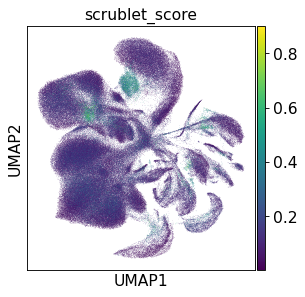

In [3]:
sc.pl.umap(adata, color='scrublet_score',save='_FS1_scrublet_score.pdf')

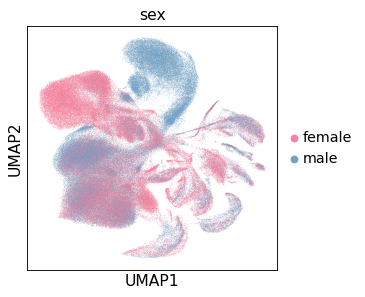

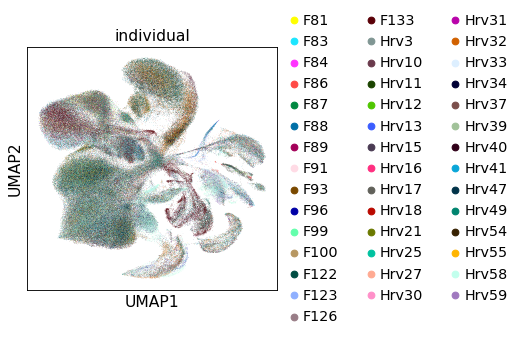

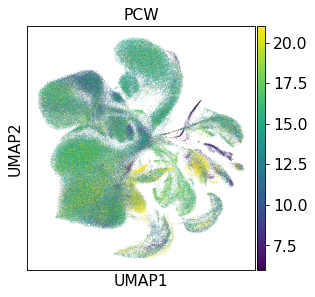

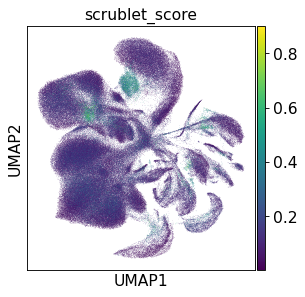

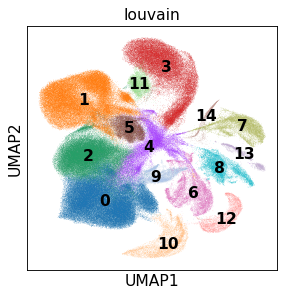

In [4]:
adata.uns['sex_colors'] = np.array(['#f5829f', '#71a2c7'])
sc.pl.umap(adata, color='sex',save='_FS1_sex.pdf')
sc.pl.umap(adata, color='individual',save='_FS1_individual.pdf')
sc.pl.umap(adata, color='PCW',save='_FS1_PCW.pdf')
sc.pl.umap(adata, color='scrublet_score',save='_FS1_scrublet_score.pdf')
sc.pl.umap(adata, color='louvain',save='_FS1_louvain.pdf', legend_loc='on data')

In [5]:
# Add cluster name and doublet information
clu_annot = pd.read_csv('figures_manual_annotation/clustering_metadata.csv', header=0, index_col=0)
import collections 

if collections.Counter(adata.obs.index) == collections.Counter(clu_annot.index): 
    print ("The lists are identical") 
else : 
    print ("The lists are not identical") 
    
vars2import = ['clusters_manual', 'is_doublet', 'scrublet_cluster_score', 'scrublet_score']
for var in vars2import:
    adata.obs[var] = clu_annot[var]

/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (24,25,27) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


The lists are identical


... storing 'clusters_manual' as categorical


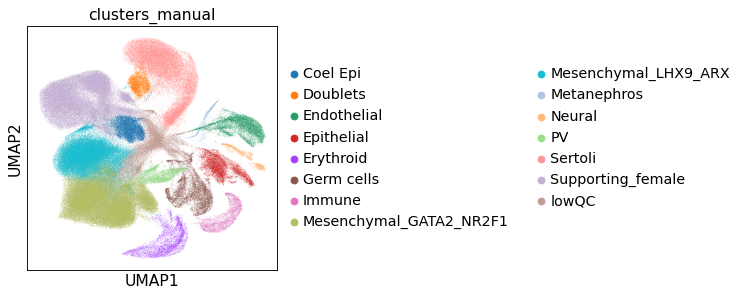

In [6]:
set(adata.obs['clusters_manual'] )
sc.pl.umap(adata, color='clusters_manual',save='_FS1_clusters_manual.pdf')

# Import supporting and mesenchymal

In [7]:
supporting = pd.read_csv('/nfs/team292/lg18/with_valentina/supporting_annotation_doublets.csv', index_col = 0)
print(supporting['annotated_clusters'].value_counts())
supporting = supporting[supporting['annotated_clusters'].isin(['coelEpi', 'sKITLG', 'sLGR5', 'sPAX8', 'preGC_I_OSR1',
                                                        'ovarianSurf', 'preGC_II_KITLG', 'preGC_III_GJA1',
                                                       'Sertoli_WFDC2', 'Sertoli', 'Sertoli_low'])]
print(supporting['annotated_clusters'].value_counts())

Sertoli            18930
preGC_II_KITLG     14105
preGC_III_GJA1     13520
preGC_I_OSR1       10768
Sertoli_low         9237
cycling             4874
ovarianSurf         4851
coelEpi             4281
Oi-like             4242
Sertoli_cycling     4103
lowQC_I             3839
sPAX8               3412
doublet_I           2473
sLGR5               2454
Sertoli_WFDC2       1024
lowQC_II            1007
coelEpi_cycling     1000
lowQC_III            968
sKITLG               903
doublet_II           759
FetalLeydig          386
lowQC_IV             112
Name: annotated_clusters, dtype: int64
Sertoli           18930
preGC_II_KITLG    14105
preGC_III_GJA1    13520
preGC_I_OSR1      10768
Sertoli_low        9237
ovarianSurf        4851
coelEpi            4281
sPAX8              3412
sLGR5              2454
Sertoli_WFDC2      1024
sKITLG              903
Name: annotated_clusters, dtype: int64


In [8]:
mesenchymal = pd.read_csv('/nfs/team292/lg18/with_valentina/mesenchymal_annotated.csv', index_col = 0)
print(mesenchymal['annotated_clusters'].value_counts())
mesenchymal = mesenchymal[mesenchymal['annotated_clusters'].isin(['FetalLeydig', 'Ti', 'Oi', 'Gi', 
                                                                  'M_MullDuct_LGR5', 'M_prog_ISL1',
                                                        'M_ALX1', 'M_MullDuct_AMHR2', 'M_MGP'])]
print(mesenchymal['annotated_clusters'].value_counts())

M_MGP               26162
Ti                  24745
M_cycling           16376
Gi                  14846
Oi                  11900
M_MullDuct_LGR5      6811
M_prog_ISL1          5021
M_ALX1               4625
M_MullDuct_AMHR2     3318
FetalLeydig          2368
Name: annotated_clusters, dtype: int64
M_MGP               26162
Ti                  24745
Gi                  14846
Oi                  11900
M_MullDuct_LGR5      6811
M_prog_ISL1          5021
M_ALX1               4625
M_MullDuct_AMHR2     3318
FetalLeydig          2368
Name: annotated_clusters, dtype: int64


In [9]:
supporting_mesenchymal = supporting.append(mesenchymal)
mapping_dict = supporting_mesenchymal['annotated_clusters'].to_dict()
adata.obs['annotated_clusters'] = adata.obs_names.map(mapping_dict)
adata.obs['annotated_clusters'].value_counts(dropna = False)

NaN                 135800
M_MGP                26162
Ti                   24745
Sertoli              18930
Gi                   14846
preGC_II_KITLG       14105
preGC_III_GJA1       13520
Oi                   11900
preGC_I_OSR1         10768
Sertoli_low           9237
M_MullDuct_LGR5       6811
M_prog_ISL1           5021
ovarianSurf           4851
M_ALX1                4625
coelEpi               4281
sPAX8                 3412
M_MullDuct_AMHR2      3318
sLGR5                 2454
FetalLeydig           2368
Sertoli_WFDC2         1024
sKITLG                 903
Name: annotated_clusters, dtype: int64

In [10]:
# Replace NaN with big clusters 
adata.obs['annotated_clusters'] = adata.obs['annotated_clusters'].fillna(adata.obs['clusters_manual'])
adata.obs['annotated_clusters'].value_counts(dropna = False)

Sertoli                    27423
M_MGP                      26162
Ti                         24745
lowQC                      20815
Mesenchymal_GATA2_NR2F1    18489
Gi                         14846
preGC_II_KITLG             14105
preGC_III_GJA1             13520
Supporting_female          12389
Oi                         11900
Germ cells                 11388
Mesenchymal_LHX9_ARX       11026
Endothelial                10948
preGC_I_OSR1               10768
Epithelial                  9679
Sertoli_low                 9237
PV                          7440
Erythroid                   7423
M_MullDuct_LGR5             6811
Doublets                    5639
Immune                      5157
M_prog_ISL1                 5021
ovarianSurf                 4851
M_ALX1                      4625
coelEpi                     4281
sPAX8                       3412
M_MullDuct_AMHR2            3318
Coel Epi                    2881
Neural                      2530
sLGR5                       2454
FetalLeydi

In [11]:
set(adata.obs['annotated_clusters'] )
adata = adata[[ i not in 'oublet' for i in adata.obs['annotated_clusters'] ]]
adata = adata[[ 'cycling' not in i for i in adata.obs['annotated_clusters'] ]]
adata = adata[[ 'lowQC' not in i for i in adata.obs['annotated_clusters'] ]]
adata = adata[[ 'Coel Epi' not in i for i in adata.obs['annotated_clusters'] ]]
adata = adata[[ 'Supporting_female' not in i for i in adata.obs['annotated_clusters'] ]]
adata = adata[[ 'Mesenchymal_GATA2_NR2F1' not in i for i in adata.obs['annotated_clusters'] ]]
adata = adata[[ 'Mesenchymal_LHX9_ARX' not in i for i in adata.obs['annotated_clusters'] ]]
adata = adata[[ 'Doublets' not in i for i in adata.obs['annotated_clusters'] ]]
set(adata.obs['annotated_clusters'] )

{'Endothelial',
 'Epithelial',
 'Erythroid',
 'FetalLeydig',
 'Germ cells',
 'Gi',
 'Immune',
 'M_ALX1',
 'M_MGP',
 'M_MullDuct_AMHR2',
 'M_MullDuct_LGR5',
 'M_prog_ISL1',
 'Metanephros',
 'Neural',
 'Oi',
 'PV',
 'Sertoli',
 'Sertoli_WFDC2',
 'Sertoli_low',
 'Ti',
 'coelEpi',
 'ovarianSurf',
 'preGC_III_GJA1',
 'preGC_II_KITLG',
 'preGC_I_OSR1',
 'sKITLG',
 'sLGR5',
 'sPAX8'}

In [12]:
adata.obs['cells'] = pd.Series(adata.obs['annotated_clusters'], dtype="category")
adata.obs['cells'].cat.reorder_categories(['Germ cells',
                                            'coelEpi',  'sKITLG', 'sLGR5', 'sPAX8', 'preGC_I_OSR1',
                                            'ovarianSurf','preGC_II_KITLG', 'preGC_III_GJA1',
                                             'Sertoli_WFDC2', 'Sertoli', 'Sertoli_low',
                                           'FetalLeydig', 'Ti',  'Oi',  'Gi', 
                                            'M_prog_ISL1', 'M_MGP', 'M_ALX1', 'M_MullDuct_AMHR2', 'M_MullDuct_LGR5', 
                                                         
                                          'PV','Epithelial', 'Endothelial', 'Immune', 'Erythroid', 'Metanephros', 'Neural' ], inplace=True)

Trying to set attribute `.obs` of view, copying.


... storing 'annotated_clusters' as categorical


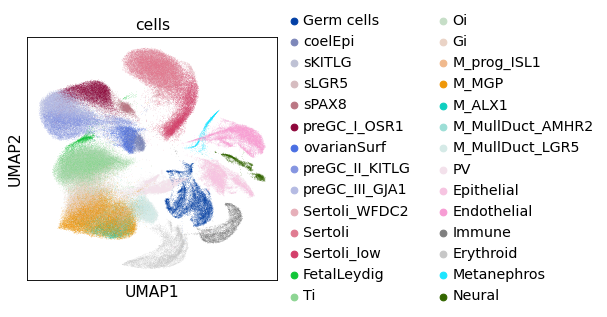

In [13]:
sc.pl.umap(adata, color='cells')

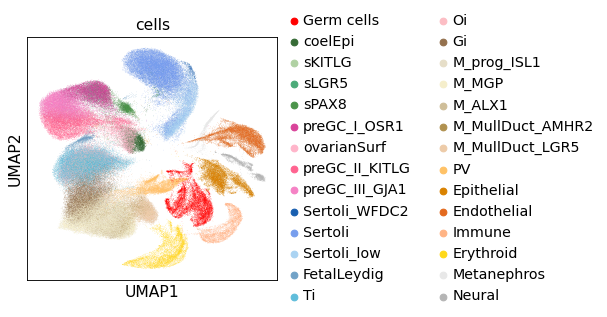

In [14]:
adata.uns['cells_colors'] = np.array(['#ff0000', # germs
                             '#366b36', '#b0d1a3', '#4bab79',  '#4b944a', # sup
                             '#d9439a', '#ffb5ca', '#ff6390',  '#f582c5', # preGC
                             '#195fb0', '#779eed', '#aad3f2', '#71a2c7', '#60bddb',   # sert and male mesen
                             '#fcbdc4', '#94714e', # Gi and Oi
                             '#e6dec8', '#f5eecb', '#cfbe99', '#b0914f',  '#edcba8', # mesen
                             '#ffc266', '#d98200', '#e36a1e',  '#ffb485', '#ffd919',  # other
                             '#e8e8e8', '#b5b5b5']) # non-relevant
sc.pl.umap(adata, color='cells',save='_F1_main.pdf')

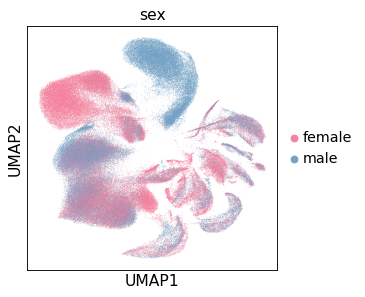

In [15]:
#remainiing cells
adata

# sex
adata.uns['sex_colors'] = np.array(['#f5829f', '#71a2c7'])
sc.pl.umap(adata, color='sex',save='_F1_sex.pdf')

# Mesenchymal TFs

In [16]:
marker_genes = {
    'PGCs': {'POU5F1', 'NANOG', 'NANOS3', 'KIT'},
    'GCs': {'DAZL', 'DDX4'}, 
    'Mesothelial': {'LRRN4', 'LHX2', 'KLK11'},
    'Supporting':{'NR5A1', 'WNT6', 'WIPF3'}, # WNT6, WIPF3, MIR202HG are new
    'preGranulosa':{"KITLG", 'FOXL2'},
    'Sertoli': {'SOX9', 'AMH', 'INHA'},
    'Mesenchymal':{'DCN', 'PDGFRA', 'COL1A1'},
    'gonadal':{'GATA4', 'LHX9', 'ARX'},
    'extragonadal':{'GATA2', 'NR2F1'},
    'PV': {"PDGFRB", 'ACTA2'},
    'Epithelial': {"EPCAM", 'PAX8'},#, 'KRT7', 'CLDN4', 'RAB25'},
    'Endothelial': {'PECAM1', 'VWF', 'CDH5'},
    'Immune': {'PTPRC', 'CD68'},
    'Erythroid': {"GYPC", "HBA1"},
    'Metanephros': {"NPHS2", "CLIC5", "PTPRO"},
    'Neural': {'ASCL1', 'ELAVL4', 'PLP1', 'MPZ', 'CHL1'}
}

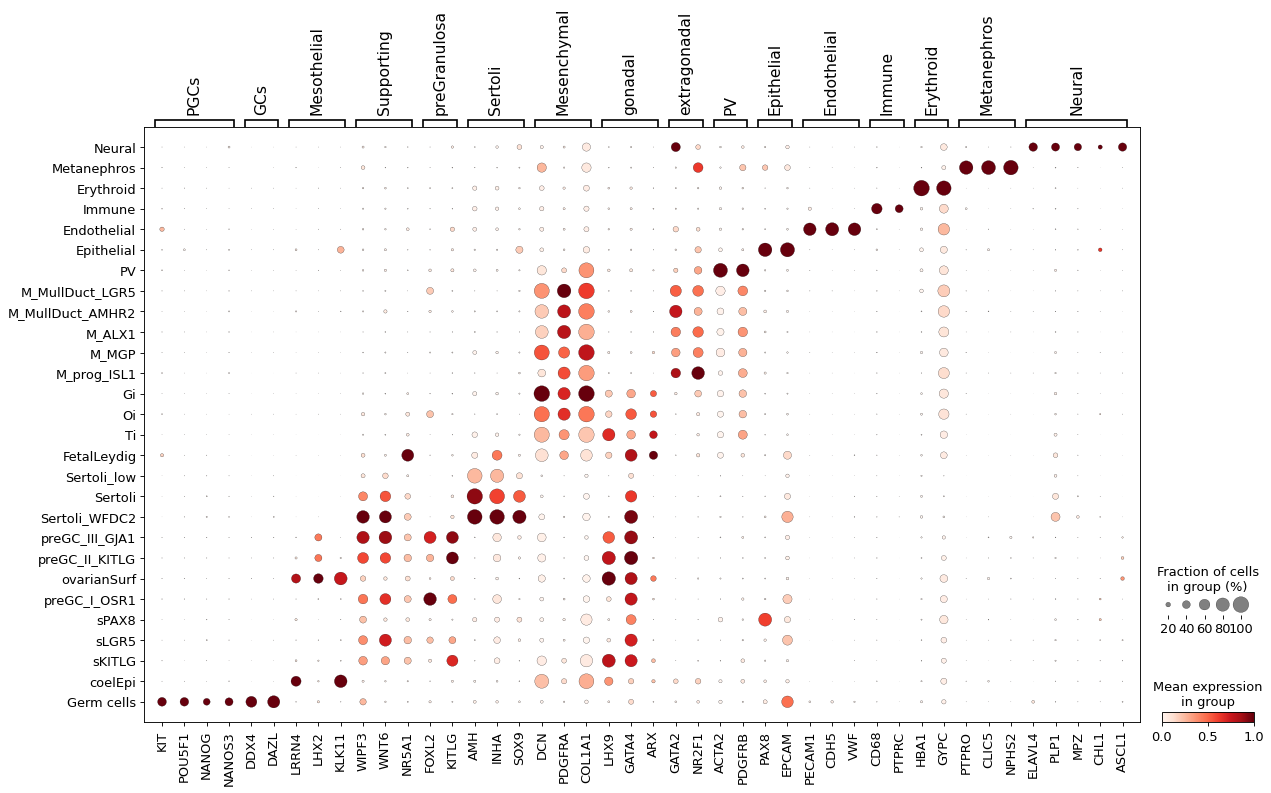

In [17]:
adata.obs['cells'].cat.reorder_categories(adata.obs['cells'].cat.categories[::-1], inplace=True)
sc.pl.dotplot(adata, marker_genes, groupby='cells', use_raw=True, standard_scale = 'var', save='_F1_markers.pdf')


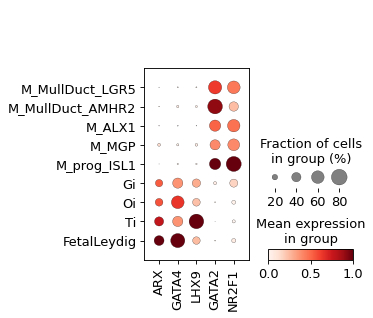

In [18]:
sc.pl.dotplot(adata[[ i in ['FetalLeydig', 'Ti',  'Oi',  'Gi', 'M_prog_ISL1', 'M_MGP', 'M_ALX1', 'M_MullDuct_AMHR2', 'M_MullDuct_LGR5', ] for i in adata.obs.cells ]], [ 'ARX', 'GATA4', 'LHX9',  'GATA2', 'NR2F1'], groupby='cells', use_raw=True, standard_scale = 'var', save='_F1_mesenTF.pdf')

# DSD

In [19]:
DSD = pd.read_csv('DSD_genes.csv', header=None, index_col=0)
DSD.head()
genes_d = DSD.index.tolist()

# from itertools import chain
genes_d = set(genes_d)
genes = [i  for i in genes_d if i in adata.raw.var_names]

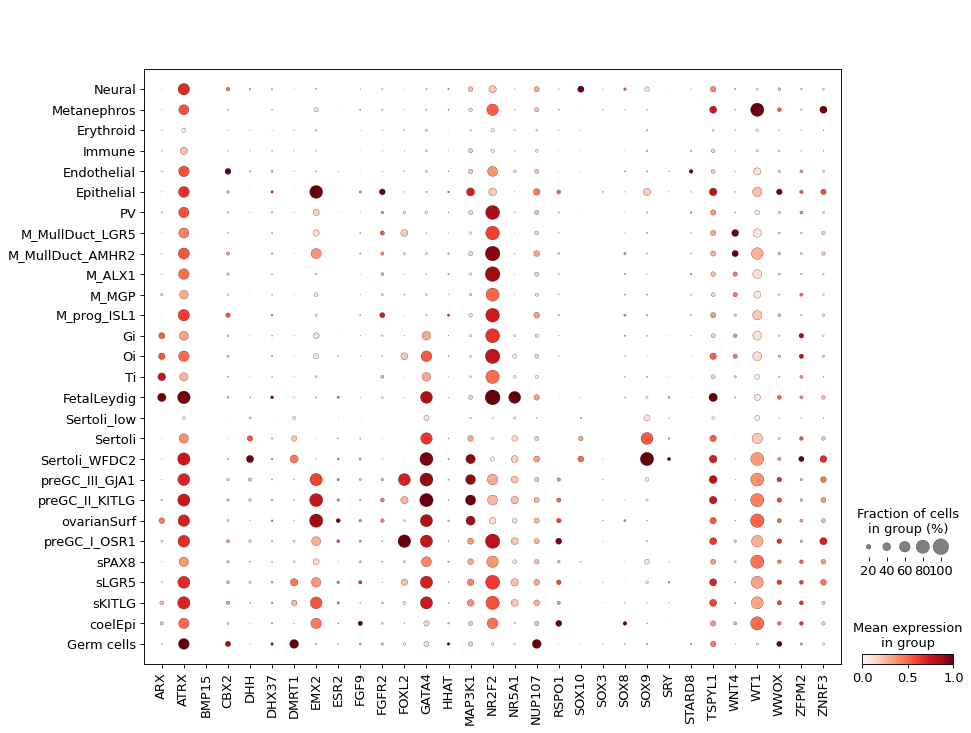

In [20]:
sc.pl.dotplot(adata, sorted(genes), groupby='cells', use_raw=True, standard_scale = 'var', save='_DSD.pdf')

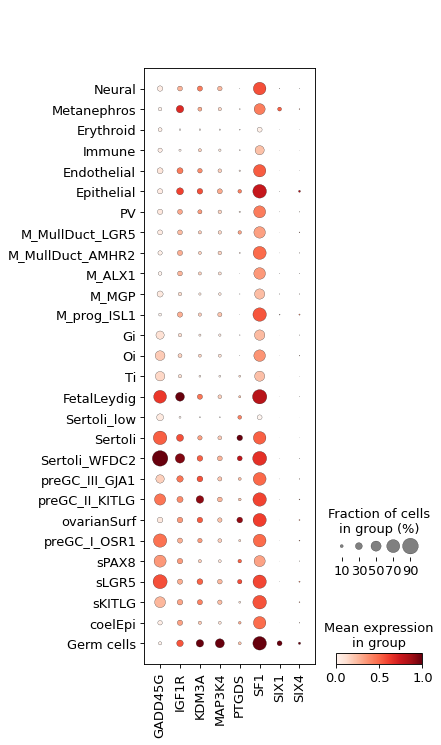

In [23]:
genes = ["SF1", "PTGDS",  "SIX1" , "SIX4", "MAP3K4", "GADD45G", "IGF1R", "KDM3A"]
sc.pl.dotplot(adata, sorted(genes), groupby='cells', use_raw=True, standard_scale = 'var', save='_DSD_SRY.pdf')

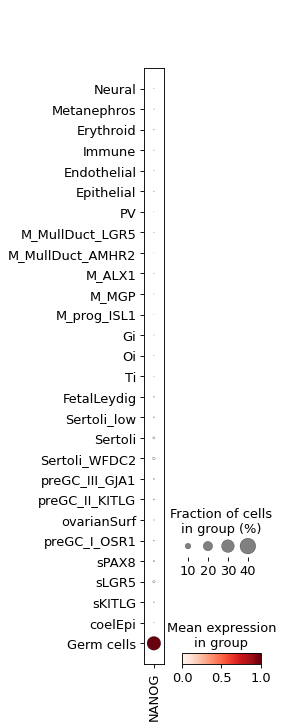

In [39]:
genes = ["NANOG"]
sc.pl.dotplot(adata, sorted(genes), groupby='cells', use_raw=True, standard_scale = 'var')